In [2]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np


transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))
])

trainset = torchvision.datasets.CIFAR10(
    root='./data',
    train=True,
    download=True,
    transform=transform)

trainloader = torch.utils.data.DataLoader(
    trainset,
    batch_size=4,
    shuffle=True,
    num_workers=2
)

testset = torchvision.datasets.CIFAR10(
    root='./data',
    train=False,
    download=True,
    transform=transform
)

testloader = torch.utils.data.DataLoader(
    testset,
    batch_size=4,
    shuffle=True,
    num_workers=2
)

classes = ('plane',
           'car',
           'bird',
           'cat',
           'deer',
           'dog',
           'frog',
           'horse',
           'ship',
           'truck')



100%|██████████| 170M/170M [07:54<00:00, 359kB/s]    


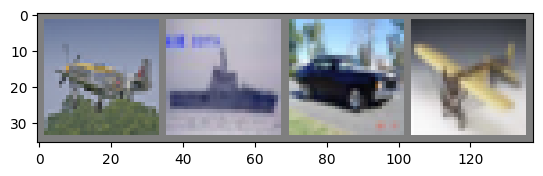

plane ship  car   plane


In [8]:
import torchvision.utils as vutils

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

dataiter = iter(trainloader)
images, labels = next(dataiter)

imshow(vutils.make_grid(images))

print(' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [13]:
import torch.nn as nn
import torch.nn.functional as F

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()

        self.conv1 = nn.Conv2d(3, 32, kernel_size=5, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        # After conv and pooling layers, CIFAR-10 images (32x32) become 64x7x7
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(x.size(0), -1)  # Flatten
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x
    
net = CNN()

Epoch 1, Batch 2000, Loss: 0.967
Epoch 1, Batch 4000, Loss: 0.943
Epoch 1, Batch 4000, Loss: 0.943
Epoch 1, Batch 6000, Loss: 0.930
Epoch 1, Batch 6000, Loss: 0.930
Epoch 1, Batch 8000, Loss: 0.919
Epoch 1, Batch 8000, Loss: 0.919
Epoch 1, Batch 10000, Loss: 0.896
Epoch 1, Batch 10000, Loss: 0.896
Epoch 1, Batch 12000, Loss: 0.880
Epoch 1, Batch 12000, Loss: 0.880
Epoch 2, Batch 2000, Loss: 0.749
Epoch 2, Batch 2000, Loss: 0.749
Epoch 2, Batch 4000, Loss: 0.765
Epoch 2, Batch 4000, Loss: 0.765
Epoch 2, Batch 6000, Loss: 0.763
Epoch 2, Batch 6000, Loss: 0.763
Epoch 2, Batch 8000, Loss: 0.751
Epoch 2, Batch 8000, Loss: 0.751
Epoch 2, Batch 10000, Loss: 0.763
Epoch 2, Batch 10000, Loss: 0.763
Epoch 2, Batch 12000, Loss: 0.742
Epoch 2, Batch 12000, Loss: 0.742
Epoch 3, Batch 2000, Loss: 0.579
Epoch 3, Batch 2000, Loss: 0.579
Epoch 3, Batch 4000, Loss: 0.617
Epoch 3, Batch 4000, Loss: 0.617
Epoch 3, Batch 6000, Loss: 0.640
Epoch 3, Batch 6000, Loss: 0.640
Epoch 3, Batch 8000, Loss: 0.631
Ep

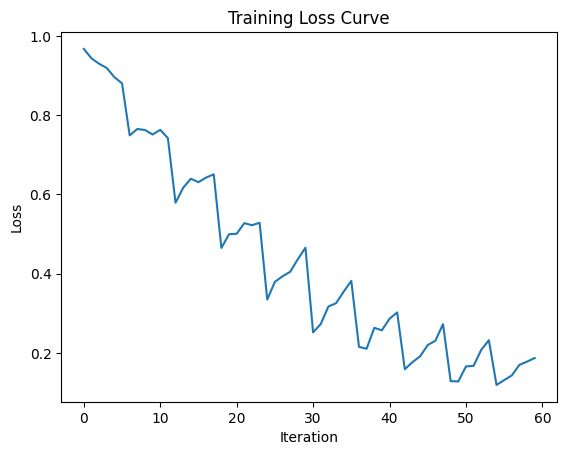

In [15]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)


epochs = 10
train_losses = []

for epoch in range(epochs):
    running_loss = 0.0
    for i, (inputs,labels) in enumerate(trainloader, 0):
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()


        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'Epoch {epoch + 1}, Batch {i+1}, Loss: {running_loss / 2000:.3f}')
            train_losses.append(running_loss / 2000)
            running_loss = 0.0

print('Finished Training')

plt.plot(train_losses)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.show()

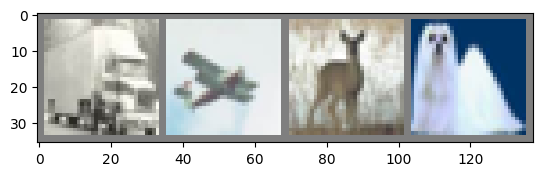

Predicted:  truck plane deer  dog  


CNN(
  (conv1): Conv2d(3, 32, kernel_size=(5, 5), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=3136, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)

In [22]:
dataiter = iter(testloader)
images, labels = next(dataiter)


imshow(vutils.make_grid(images))

outputs = net(images)

_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}' for j in range(4)))

torch.save(net.state_dict(), 'cifar10_cnn.pth')

net = CNN()
net.load_state_dict(torch.load('cifar10_cnn.pth'))
net.eval()